In [1]:
import open3d as o3d
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [13]:
pcd = o3d.io.read_point_cloud("/home/ubuntu/Desktop/visual-localization-challenge-2020/indoor_dataset/1f/train/2019-04-16_14-35-00/map.pcd")

Testing IO for point cloud ...


In [14]:
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [110]:
# raw_pose = [ 4.8888623e+02, -3.9633441e+02,  2.2997179e+00,  7.1705699e-01, -5.9931654e-01,  2.2931930e-01, -2.7214259e-01]
raw_pose = [ 4.8450430e+02, -3.6540289e+02,  2.2664781e+00, -1.7449126e-02,  1.6263738e-02, -6.4375120e-01,  7.6486301e-01]
camera_pose = raw_pose[:3]

In [117]:
print("Find its neighbors with distance less than 10, paint green.")
[k, idx, _] = pcd_tree.search_radius_vector_3d(camera_pose, 10.0)

Find its neighbors with distance less than 10, paint green.


In [118]:
k

3764476

In [119]:
A = np.array([[1725.842032333, 0.0, 1024.0],
              [0.0, 1725.842032333, 768.0],
              [0.0, 0.0, 1.0]])

In [120]:
Rt = np.identity(4)
Rt[:3,3] = raw_pose[:3]
qw = raw_pose[3]
qx = raw_pose[4]
qy = raw_pose[5]
qz = raw_pose[6]
Rt[:3,:3] = R.from_quat([qx,qy,qz,qw]).as_matrix()

In [121]:
projected_img = np.zeros((1536,2048))

for point in np.asarray(pcd.points)[idx]:
    point3d_local = np.linalg.inv(Rt)@(np.asarray([point[0],point[1],point[2],1]))
    projected_point = A@point3d_local[:3]
    hnormalized_point = projected_point/projected_point[2]
    
    if (0 <= hnormalized_point[0] and hnormalized_point[0] <= 2048 and
        0 <= hnormalized_point[1] and hnormalized_point[1] <= 1536):
        projected_img[int(hnormalized_point[1]), int(hnormalized_point[0])] = 0.1

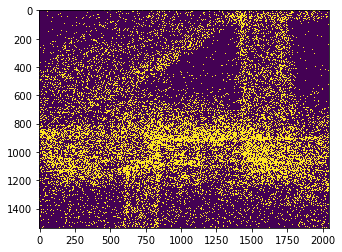

In [122]:
plt.imshow(projected_img)